In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

In [2]:
data_train=pd.read_csv('data_train.csv',encoding='ISO-8859-1',index_col=0)
pre=pd.read_csv('data.csv',encoding='ISO-8859-1',index_col=0)

In [3]:
data_train2 = data_train[['AngM1-N-M2', 'dM1-M2',  'MagM1',  'RM1',
      'NoutM1', 'Hf,oxM1','XM1', 'EAM1', 'EiM1',
       'MagM2',  'RM2', 'NoutM2', 'Hf,oxM2',
        'XM2', 'EAM2', 'EiM2','Uorr']]
pre2 = pre[['AngM1-N-M2', 'dM1-M2',  'MagM1',  'RM1',
      'NoutM1', 'Hf,oxM1','XM1', 'EAM1', 'EiM1',
       'MagM2',  'RM2', 'NoutM2', 'Hf,oxM2',
        'XM2', 'EAM2', 'EiM2']]

In [4]:
x=data_train2.iloc[:, 0:-1].values
y=data_train2.iloc[:,-1].values
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
p=scaler.fit_transform(pre2)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=14)

In [6]:
params = {'n_estimators':500,
          'max_depth':2,
          'min_samples_split':2,
          'min_samples_leaf':1,
          'learning_rate': 0.05,
          'loss': 'squared_error'
         }

In [7]:
model = GBR(**params)
model.fit(x_train,y_train)
score= model.score(x_test,y_test)

In [8]:
y_pred_train_model = model.predict(x_train)
y_pred_test_model = model.predict(x_test)
y_train_data=model.predict(x)
rmse = np.sqrt(mse(y_train,model.predict(x_train)))
r2=r2_score(y_train, model.predict(x_train))

rmset=np.sqrt(mse(y_test,model.predict(x_test)))
r2t=r2_score(y_test,model.predict(x_test))

print(rmse)
print(r2)
print(rmset)
print(r2t)

0.0004718447864888391
0.9999984921521302
0.05721119585798473
0.982008044813527


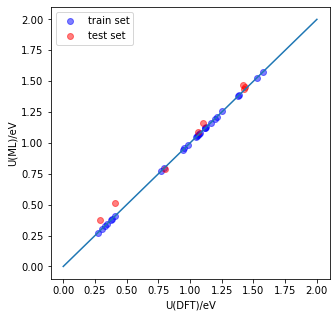

In [9]:
plt.subplots(1,1,figsize=(5,5))
plt.plot([0,2],[0,2])
plt.scatter(y_train,y_pred_train_model,alpha=0.5,color='blue',label='train set')
plt.scatter(y_test,y_pred_test_model,alpha=0.5,color='red',label='test set')

plt.xlabel('U(DFT)/eV')
plt.ylabel('U(ML)/eV')
plt.legend()
plt.show()

In [10]:
prediction = model.predict(p)

In [11]:
print('pre:',model.predict(x_test))
print(y_test)
print('pre1:',model.predict(p))

pre: [0.78502202 1.16072451 1.46656645 0.51216446 0.37635494 1.43947958
 1.08501832 1.45072333]
[0.80164936 1.09835241 1.41995257 0.40935231 0.28612816 1.42343686
 1.05996672 1.43493707]
pre1: [1.54441615 1.45352516 1.53770545 1.49473315 1.43299061 1.45442487
 1.51375248 1.39461869 1.48730451 1.47417331 1.33872361 1.31493678
 1.1216142  1.29590615 1.17779381 1.15900199 1.05818252 1.11565424
 1.23181541 1.19842988 1.11520534 1.16203167 1.08969255 1.05636843
 1.09885099 0.95549251 1.02002782 0.97582243 1.03229017 1.07001812
 0.96515852 0.99301964 0.99307027 0.41373151 0.27475395 0.38889895
 0.32819304 0.3472712  0.35710425 0.35014046 0.37696331 0.38492447
 0.41737434 0.40013233 0.8074605  0.64246532 0.79205027 0.73705647
 0.769853   0.73189421 0.75528748 0.79401212 0.78759321 0.78784353
 0.78836382 1.53769498 1.22911782 1.38293816 1.38677087 1.32282985
 1.10232135 1.42814059 1.44546401 1.19890855 1.38930797 1.35547746
 0.62457595 0.28848193 0.45398067 0.36291258 0.39189691 0.47750588
 0.

In [12]:
import shap

In [13]:
explainer=shap.TreeExplainer(model)
explanation=explainer(x)
shap_values=explanation.values

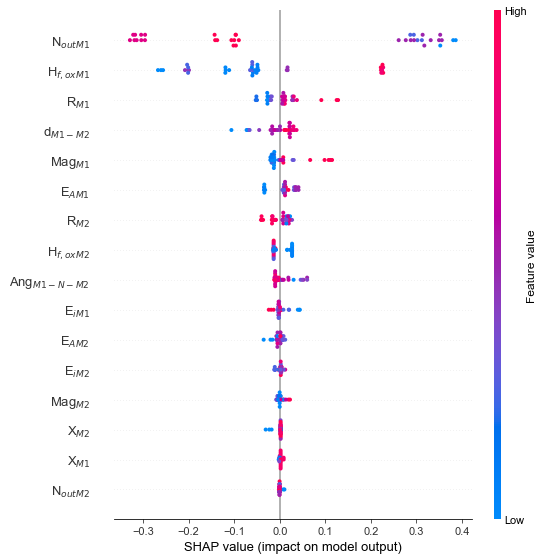

In [14]:
shap.summary_plot(shap_values,
                  features=x,
                 feature_names=['Ang$_{M1-N-M2}$', 'd$_{M1-M2}$',  'Mag$_{M1}$',  'R$_{M1}$',
      'N$_{outM1}$', 'H$_{f,oxM1}$','X$_{M1}$', 'E$_{AM1}$', 'E$_{iM1}$',
       'Mag$_{M2}$',  'R$_{M2}$', 'N$_{outM2}$', 'H$_{f,oxM2}$',
        'X$_{M2}$', 'E$_{AM2}$', 'E$_{iM2}$'], show = False, plot_type='dot')
plt.rcParams['font.sans-serif']=['Arial']
np.savetxt('shap.csv',shap_values, delimiter=",")